
## 인공지능 개론 6주차

#### 실습 126p - 딥러닝

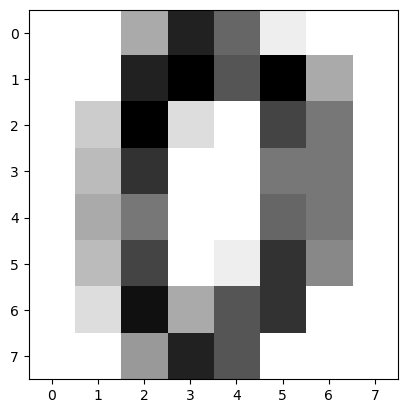

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np

digits = datasets.load_digits()
plt.imshow(digits.images[0],cmap=plt.cm.gray_r, interpolation='nearest')

In [15]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

In [16]:
# 독립변수, 종속변수 분리
x = data
y = digits.target

In [17]:
# y를 one-hot-encoding
import pandas as pd

y = pd.get_dummies(y).values

In [22]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

y_train.shape[1]

10

#### 딥러닝 모델

In [33]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(15,activation='sigmoid'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 30)                1950      
                                                                 
 dense_33 (Dense)            (None, 20)                620       
                                                                 
 dense_34 (Dense)            (None, 15)                315       
                                                                 
 dense_35 (Dense)            (None, 5)                 80        
                                                                 
Total params: 2,965
Trainable params: 2,965
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split= 0.1)
Y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(Y_pred,axis=1)


Epoch 1/30


ValueError: in user code:

    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 5) are incompatible
